In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# XGBOOSTING

### Modelagem de 'human activity recognition'

Base contendo telemetria de um celular capturando os movimentos em várias direções a fim de verificar se a pessoa está se movimentando/exercitando.

In [59]:
har_train = pd.read_csv(r'bases\HAR_train.csv')
har_test = pd.read_csv(r'bases\HAR_test.csv')

In [60]:
har_train

,V1,X1tBodyAcc.mean.X,X2tBodyAcc.mean.Y,X3tBodyAcc.mean.Z,X4tBodyAcc.td.X,X5tBodyAcc.td.Y,X6tBodyAcc.td.Z,X7tBodyAcc.mad.X,X8tBodyAcc.mad.Y,X9tBodyAcc.mad.Z,...,X553fBodyBodyGyroJerkMag.kewne,X554fBodyBodyGyroJerkMag.kurtoi,X555angletBodyAccMeangravity,X556angletBodyAccJerkMeangravityMean,X557angletBodyGyroMeangravityMean,X558angletBodyGyroJerkMeangravityMean,X559angleXgravityMean,X560angleYgravityMean,X561angleZgravityMean,y
0,em_pe,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,em pé
1,em_pe,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,em pé
2,em_pe,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,em pé
3,em_pe,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,em pé
4,em_pe,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,em pé
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,subindo,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,subindo
7348,subindo,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,subindo
7349,subindo,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,subindo
7350,subindo,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,subindo


In [61]:
har_train['V1'].value_counts()

deitado     1407
em_pe       1374
sentado     1286
andando     1226
subindo     1073
descendo     986
Name: V1, dtype: int64

In [62]:
har_train = har_train.drop('y', axis=1)
har_test = har_test.drop('y', axis=1)

## Análise Descritiva

Text(0.5, 0, 'Atividade realizada')

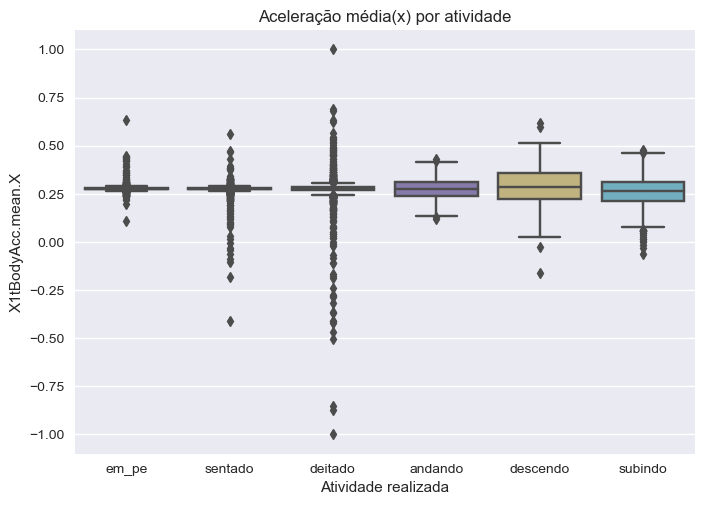

In [63]:
plt.style.use('seaborn')
sns.boxplot(x=har_train.V1, y=har_train['X1tBodyAcc.mean.X'])
plt.title('Aceleração média(x) por atividade')
plt.xlabel('Atividade realizada')

Text(0.5, 0, 'Atividade realizada')

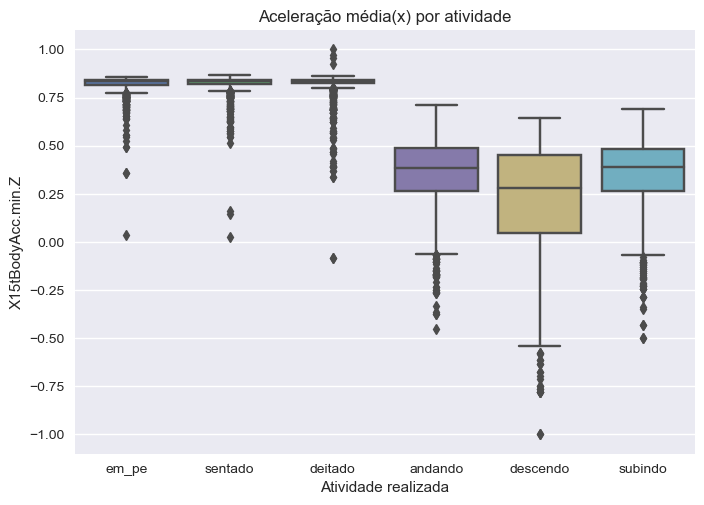

In [64]:
plt.style.use('seaborn')
sns.boxplot(x=har_train.V1, y=har_train.iloc[:,15])
plt.title('Aceleração média(x) por atividade')
plt.xlabel('Atividade realizada')

## Selecionando as Variáveis Importantes usando Árvore 

property feature_importances_
Return the feature importances.

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See sklearn.inspection.permutation_importance as an alternative.

In [65]:
from sklearn.tree import DecisionTreeClassifier 

X_train = har_train.drop('V1', axis=1)
y_train = har_train['V1']


# Aplicando o Modelo
arvore = DecisionTreeClassifier(criterion='gini', 
                               ccp_alpha =0.1, 
                               min_samples_split=2, 
                               max_depth = 6)

arvore = arvore.fit(X_train, y_train)

In [66]:
var_importantes = pd.DataFrame(arvore.feature_importances_, 
                               index=arvore.feature_names_in_, columns=['valor']) 

var_importantes.sort_values('valor', ascending=False)

,valor
X53tGravityAcc.min.X,0.402235
X394fBodyAccJerk.bandEnergy.124,0.361435
X560angleYgravityMean,0.236329
X383fBodyAccJerk.bandEnergy.916,0.000000
X382fBodyAccJerk.bandEnergy.18,0.000000
...,...
X182tBodyGyroJerk.iqr.Z,0.000000
X181tBodyGyroJerk.iqr.Y,0.000000
X180tBodyGyroJerk.iqr.X,0.000000
X179tBodyGyroJerk.energy.Z,0.000000


## XGBOOSTING

Documentação: https://xgboost.readthedocs.io/en/stable/

XGBoost Classifier: https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier

GridSeachCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [69]:
# Transforma as variáveis Categóricas em Categóricas Numéricas
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)

var_treino = har_train['V1']
var_teste = har_test['V1']

# Encoding the variable
har_train['V1'] = d[var_treino.name].fit_transform(var_treino)
har_test['V1'] = d[var_teste.name].fit_transform(var_teste)

# Selecionando Variáveis Nova Base
X_train_select = X_train[['X53tGravityAcc.min.X', 
                         'X394fBodyAccJerk.bandEnergy.124', 
                         'X560angleYgravityMean']]
y_train = har_train['V1']

In [70]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


# Definir os parâmetros que serão otimizados
param_grid = {
    'n_estimators': [50],
    'max_depth': [1, 4],
    'gamma': [0],
    'learning_rate': [0.05, 0.4], # ETA
    'colsample_bytree': [0.7],
    'min_child_weight': [1],
    'subsample': [0.7]    
}


# Criar o classificador XGBoost
xgb_classifier = xgb.XGBClassifier()

# Criar o objeto GridSearchCV para realizar a busca em grade
grid_search = GridSearchCV(estimator=xgb_classifier, 
                           param_grid=param_grid, 
                           cv=2)

# Escolhendo as Variáveis de maior importância



# Realizar a busca em grade nos dados de treinamento
grid_search.fit(X_train_select, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7], 'gamma': [0],
                         'learning_rate': [0.05, 0.4], 'max_depth': [1, 4],
                         'min_child_weight': [1], 'n_estimators': [50],
                         'subsample': [0.7]})

In [72]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.4,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 50,
 'subsample': 0.7}

In [73]:
grid_search.best_score_

0.794069640914037

In [80]:
y_pred_train = grid_search.predict(X_train_select)
y_pred_test = grid_search.predict(har_test[['X53tGravityAcc.min.X', 
                         'X394fBodyAccJerk.bandEnergy.124', 
                         'X560angleYgravityMean']])

## Acurácia

### Base Treino

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

0.860582154515778

### Base Teste

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(har_test['V1'], y_pred_test)

0.6986766202918222

Escolhendo melhor as variáveis podemos aumentar a acurácia do modelo.